# Diffusion equation

strong form of the initial boundary value problem

$$
\begin{align*}
&\text{Find}~u(\textbf{x}, t): \Omega\times[0,\infty) \to \mathbb{R}~\text{such that } \\
&\begin{cases}
\frac{\partial u}{\partial t} = \nabla\cdot(\mathsf{D}\cdot\nabla u) & \forall(\textbf{x}, t)\in\Omega\times[0,\infty) \\
u(\textbf{x}, t=0)=u_0 & \forall\textbf{x}\in\Omega\\
u=u_{\text{D}} & \forall \textbf{x}\in\partial\Omega_{\text{D}} \\
\textbf{n}\cdot(\mathsf{D}\cdot\nabla{u})  = u_{\text{N}} & \forall\textbf{x}\in\partial\Omega_{\text{N}}=\partial\Omega/\partial\Omega_{\text{D}}
\end{cases}~.
\end{align*}
$$

weak form

$$
\begin{align*}
&\text{Find}~u^{n+1}\in V~\text{such that} \\
&F(u^{n+1}, v)=\int_\Omega\text{d}\Omega~v\frac{u^{n+1} - u^n}{\Delta t^n} + \nabla v\cdot\mathcal{D}(\mathsf{D}\cdot\nabla u) - \int_{\partial\Omega_{\text{N}}}\text{d}\Gamma~vu_{\text{N}}=0 \quad\forall v\in V~.
\end{align*}
$$

problem specification

$$\mathbb{S}=\{\Omega, \partial\Omega_{\text{D}}, \partial\Omega_{\text{N}}, u_{\text{D}}, u_{\text{N}}, u_0, \mathsf{D}\}$$

## Example: diffusion of a Gaussian on an interval

$$
\mathbb{S}=
\begin{cases}
\Omega = [0, L_x] \\
\mathsf{D}=D\mathsf{I} \\
u_{\text{D}}(x=0) = 0 \\
u_{\text{D}}(x=L_x) = 0 
\end{cases}
$$

In [ ]:
import numpy as np

from lucifex.mesh import rectangle_mesh, interval_mesh, mesh_boundary
from lucifex.fdm import BE, FunctionSeries
from lucifex.fem import Constant
from lucifex.solver import ibvp, BoundaryConditions
from lucifex.viz import plot_colormap, plot_line
from lucifex.utils import cross_section
from lucifex.io import write, get_ipynb_file_name
from lucifex.pde.diffusion import diffusion


Lx = 2.0
mesh = interval_mesh(Lx, 100)
boundary = mesh_boundary(
    mesh, 
    {
        "left": lambda x: x[0],
        "right": lambda x: x[0] - Lx,
    },
)

dt = Constant(mesh, 0.01, name='dt')
k = Constant(mesh, 1.0, name='k')

ics = lambda x: np.exp(-(x[0] - Lx/2)**2 / (0.01 * Lx))
bcs =  BoundaryConditions(
    ("dirichlet", boundary['left', 'right'], 0.0), 
)
u = FunctionSeries((mesh, 'P', 1), name='u', store=1)
u_solver = ibvp(diffusion, ics, bcs)(u, dt, k, BE)

In [3]:
t = 0.0
t_stop = 10.0
n = 0
n_stop = 5

while n < n_stop and t < t_stop:
    u_solver.solve()
    u.forward(t)
    t += dt.value
    n += 1

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='$x$', ylabel='$u$'>)

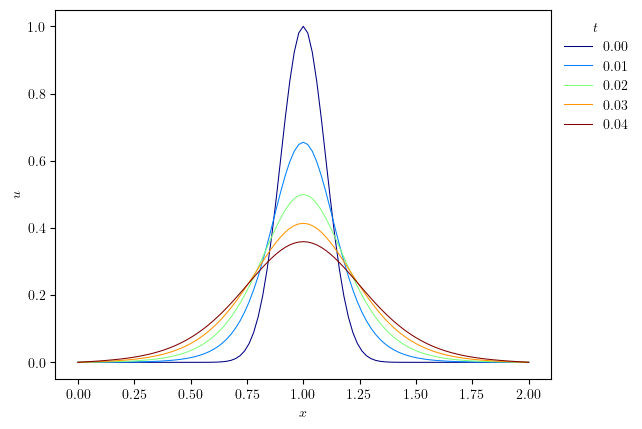

In [ ]:
slc = slice(0, None)
legend_labels = [f'{t:.2f}' for t in u.time_series[slc]]
fig, ax = plot_line(u.series[slc], legend_labels, 't', cyc='jet', x_label='$x$', y_label=u.name)
write(fig, get_ipynb_file_name(), './figures')